In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve


DataPath_1='./Data/Data_F3_Stoch_BBBm'
DataPath_2='./Data/Data_F3_Stoch_BBBm_dec'
DataPath_3='./Data/Data_F3_Stoch_BBBm_short'
DataPath_4='./Data/Data_F3_Stoch_BBBm_long'
DataPath_rate='./Data/Data_F3_Rate_BBBm_4injuries'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm.ipynb
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm_dec.ipynb
if not os.path.isdir(DataPath_3):
    os.makedirs(DataPath_3)
if not os.path.isfile(DataPath_3+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm_short.ipynb
if not os.path.isdir(DataPath_4):
    os.makedirs(DataPath_4)
if not os.path.isfile(DataPath_4+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm_long.ipynb
if not os.path.isdir(DataPath_rate):
    os.makedirs(DataPath_rate)
if not os.path.isfile(DataPath_rate+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Rate_BBBm_4injuries.ipynb

In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

## Figure 3a  

In [4]:
##### Calculating latent period duration for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=30

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_sim=day_first_seiz
LP_mean=np.mean(day_first_seiz)   
LP_sem=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simdec=day_first_seiz
LP_mean_dec=np.mean(day_first_seiz)   
LP_sem_dec=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simshort=day_first_seiz
LP_mean_short=np.mean(day_first_seiz)   
LP_sem_short=np.std(day_first_seiz)/np.sqrt(N)

day_first_seiz=np.zeros(N)
for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_4+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    day_first_seiz[ii]=seiz_days[0]
day_first_seiz_simlong=day_first_seiz
LP_mean_long=np.mean(day_first_seiz)   
LP_sem_long=np.std(day_first_seiz)/np.sqrt(N)

In [6]:
print(LP_mean)
print(LP_sem)
print(day_first_seiz_sim[day_first_seiz_sim>7])
print(min(day_first_seiz_sim))

4.966666666666667
0.3349405696316664
[ 8.  8. 10.]
2.0


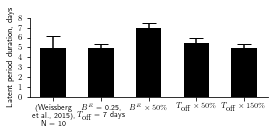

In [6]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()
vec=np.array([1,2,3,4,5])
plt.bar(np.array(vec),np.array([data['LatentPeriod_mean'], LP_mean, LP_mean_dec, LP_mean_short, LP_mean_long]), color='black',
       yerr=[data['LatentPeriod_sem'],LP_sem, LP_sem_dec, LP_sem_short, LP_sem_long],
       align='center',
       alpha=1,
       ecolor='black',
       capsize=10/3*2,width=0.8/3*2)

plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"$B^E$ = 0.25,""\n" r"$T_\textnormal{off}$ = 7 days",
                             r"$B^E \times 50\%$",
                             r"$T_\textnormal{off} \times 50\%$",
                             r"$T_\textnormal{off} \times 150\%$"], fontsize=7.5)

plt.yticks(np.arange(0,9))
plt.ylabel('Latent period duration, days')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3*w,w)
fig.savefig('Figures/Fig3/Fig_3a.pdf')

In [7]:
## STATISTICS U TEST:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simdec,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simshort,alternative='two-sided')
print('Statistics SHORT=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(day_first_seiz_sim, day_first_seiz_simlong,alternative='two-sided')
print('Statistics LONG=%.3f, p=%.3f' % (stat, p))
print(p)

# plt.hist(day_first_seiz_sim,edgecolor='k',alpha=0.25)
# plt.hist(day_first_seiz_simdec,alpha=0.25)
# plt.hist(day_first_seiz_simlong,alpha=0.25)
# plt.hist(day_first_seiz_simshort,alpha=0.25)

Statistics DEC=266.500, p=0.006
0.005858818189238063
Statistics SHORT=431.000, p=0.777
0.7771826955666062
Statistics LONG=450.000, p=0.994
0.9938709023254123


## Figure 3b

In [8]:
##### Calculating seizure frequency on days 4-32 for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=30
day_0=4
day_end=32

for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_sim=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
avg_num_seiz_per_day[day_0-1:day_end]
SeizFr_sem=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simdec=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_dec=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_dec=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simshort=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_short=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_short=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_4+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simlong=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_long=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_long=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)

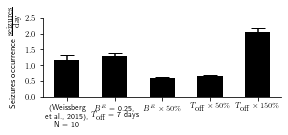

In [9]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()

vec=np.array([1,2,3,4,5])
plt.bar(vec,np.array([data['Seizure_freq_mean'], SeizFr_mean,SeizFr_mean_dec,SeizFr_mean_short,SeizFr_mean_long]), color='black',
       yerr=[data['Seizure_freq_sem'],SeizFr_sem,SeizFr_sem_dec,SeizFr_sem_short,SeizFr_sem_long],
       align='center',
       alpha=1,
       ecolor='black',
       capsize=10/3*2,width=0.8/3*2)

plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"$B^E$ = 0.25,""\n" r"$T_\textnormal{off}$ = 7 days",
                             r"$B^E \times 50\%$",
                             r"$T_\textnormal{off} \times 50\%$",
                             r"$T_\textnormal{off} \times 150\%$"], fontsize=7.5)

plt.yticks(np.arange(0,3,0.5))

plt.ylabel(r"Seizures occurrence $\frac{\textnormal{seizures}}{\textnormal{day}}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3*w,w)
fig.savefig('Figures/Fig3/Fig_3b.pdf')

In [10]:
## STATISTICS U TEST:
from scipy.stats import mannwhitneyu

## calculating seiz freq per simulation for 4 different simulation injuries intensitites
SeizFr_mean_ProSim=np.mean(num_seiz_at_days_sim[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_dec=np.mean(num_seiz_at_days_simdec[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_short=np.mean(num_seiz_at_days_simshort[:,day_0-1:day_end],axis=1)
SeizFr_mean_ProSim_long=np.mean(num_seiz_at_days_simlong[:,day_0-1:day_end],axis=1)

## getting p values
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_dec,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_short,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)
stat, p = mannwhitneyu(SeizFr_mean_ProSim,SeizFr_mean_ProSim_long,alternative='two-sided')
print('Statistics DEC=%.3f, p=%.3f' % (stat, p))
print(p)

# plt.hist(SeizFr_mean_ProSim,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_dec,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_short,alpha=0.5)
# plt.hist(SeizFr_mean_ProSim_long,alpha=0.5)

Statistics DEC=887.000, p=0.000
1.0661540128194368e-10
Statistics DEC=869.500, p=0.000
5.648804323230198e-10
Statistics DEC=64.000, p=0.000
1.1774292315173832e-08


## Figure 3c

In [11]:
# Calculation of data from raw simulated data
N=30 
for ii in range(1,N+1): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==1:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
        
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])

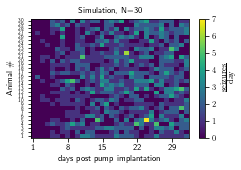

In [12]:
day_0 = 0
day_end = 32
days_vect= np.linspace(day_0, day_end, day_end-day_0+1, endpoint=True)

fig, ax = plt.subplots()

im = plt.pcolormesh(days_vect, np.arange(0,N+1),num_seiz_at_days[:,day_0:day_end])
cbar=plt.colorbar(im)
cbar.set_label(r'$\frac{\textnormal{seizures}}{\textnormal{day}}$', rotation=90)

plt.xticks(days_vect[0:-1:7]+0.5,days_vect[0:-1:7].astype(int)+1)
plt.yticks(np.arange(0,N+1)+0.5,np.arange(0,N+1)+1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(5) 
    tick.label.set_rotation('horizontal')
plt.xlim([day_0, day_end])
plt.ylim([0,N])

plt.xlabel('days post pump implantation')
plt.ylabel(' Animal \#')
plt. title ('Simulation, N=30', fontsize=font['size'])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2.5*w,1.5*w)
fig.savefig('Figures/Fig3/Fig_3c.pdf')

## Figure 3d

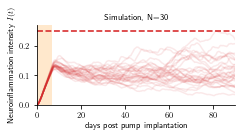

In [13]:
N=30
day_0=0
day_end=90


listt=np.load(DataPath_1+'/Sim_'+str(1)+'.npy',allow_pickle=True)
rect = patches.Rectangle((0,-1),listt[0]['IBDR_E_duration'][1],2,linewidth=1,edgecolor='none',facecolor='darkorange',alpha=0.2)

fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

ax.add_patch(rect)
plt.plot([day_0, day_end],[listt[0]['Theta'],listt[0]['Theta']],'--',color='tab:red',linewidth = 4.0/size_scaler)

for ii in range(0,N):
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    plt.plot(t_vec[day_0:int(day_end/dt)],I_vec[day_0:int(day_end/dt)],color='tab:red',alpha=0.1)
    
plt.ylim([0,0.27])
plt.xlim([day_0,day_end])
plt.xticks(np.arange(0,day_end+1,20))
plt.xlabel('days post pump implantation')
plt.ylabel(r'Neuroinflammation intensity $I(t)$')
plt. title (r'Simulation, N=30',fontsize=font['size'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2.5*w,1*w) 
fig.savefig('Figures/Fig3/Fig_3d.pdf')

## Figure 3e

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


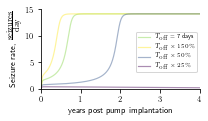

In [14]:
N=4
labels=[r'$T_\textnormal{off}$ = 7 days',r'$T_\textnormal{off} \times 150\%$',r'$T_\textnormal{off} \times 50\%$',r'$T_\textnormal{off} \times 25\%$']
t_dvis=365 # scalar for time to be in [years]
lambda_max=np.load(DataPath_1+'/Sim_1.npy',allow_pickle=True)[0]['lambda_max']
color_index=np.array([3,4,1,0])

fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)   

for ii in range(0,N):
    listt=np.load(DataPath_rate+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    listt[0]['lambda_max']=lambda_max
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    plt.plot(t_vec/t_dvis, SeizureRate(I_vec,R_vec, listt[0]), color=color_scheme_5examples[color_index[ii]], alpha=alpha_value,linewidth=3/size_scaler,label=labels[ii])


plt.ylim([0,15])
plt.xlim([0,4])
plt.yticks([0,5,10,15])
plt.xticks(np.arange(0,5,1))

plt.xlabel('years post pump implantation')
plt.ylabel(r'Seizure rate, $\frac{\textnormal{seizures}}{\textnormal{day}}$')
ax.legend(bbox_to_anchor=(1,0.75),fontsize=6)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(2*w,w)
fig1.savefig('Figures/Fig3/Fig_3e.pdf') 

## Figure 3f

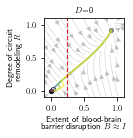

In [15]:
N=4
color_index=np.array([3,4,1,0])

params=load_default_parameters('rate')
locals().update(params)
IC_SET = [-0.5,0,0.1,0.2,0.5, 0.7, 2] # set of initial condintions for steady state coordinates search
D_const=0

B_max = 1.1
R_max = 1.1
B_min = -0.1
R_min = -0.1
    
R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]
   
FP=[];
f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
U = 1./tau_B*(-B+k_IB*k_BI*B+f)
V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 
#     velocity = np.sqrt(U*U + V*V)                
FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step
    
pylab.ion()
fig0= plt.figure()
ax0 = fig0.add_subplot(1, 1, 1)
strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

for cc in range(len(FP)):
    if FP[cc][0]>=Theta:
        if D_const == D_m:
            col='black' # globally stable since here dD_dt = 0 , despite B>=Theta
        else:
            col='grey' # stable only with D holded at const
    else:
        col='black' # globally stabe since dD_dt = 0 due to B<Theta

    mrksize = 10
    if FP[cc][1]=='Unstable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
    if FP[cc][1]=='Semistable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
    if FP[cc][1]=='Stable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

for ii in [2,0,1,3]:
    listt=np.load(DataPath_rate+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    dt=listt[0]['dt']
    B_vec=listt[1]['B_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    plt.plot(B_vec, R_vec, color=color_scheme_5examples[color_index[ii]], alpha=alpha_value+0.2,linewidth=4/size_scaler)        
        
        
threshold_position = Theta/k_BI
plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)

plt.xlabel("Extent of blood-brain \n" 
           r"barrier disruption $B \approx I$")
plt.ylabel("Degree of circuit \n"
           r"remodeling $R$")
plt.title('$D$='+str(D_const),fontsize=font['size'])

ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('Figures/Fig3/Fig_3f1.pdf')  

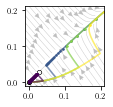

In [16]:
N=4
color_index=np.array([3,4,1,0])

params=load_default_parameters('rate')
locals().update(params)
IC_SET = [-0.5,0,0.1,0.2,0.5, 0.7, 2] # set of initial condintions for steady state coordinates search
D_const=0

B_max = 0.21
R_max = 0.21
B_min = -0.01
R_min = -0.01
dt_vis=30
    
R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]
   
FP=[];
f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
U = 1./tau_B*(-B+k_IB*k_BI*B+f)
V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 
#     velocity = np.sqrt(U*U + V*V)                
FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step
    
pylab.ion()
fig0= plt.figure()
ax0 = fig0.add_subplot(1, 1, 1)
strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

for cc in range(len(FP)):
    if FP[cc][0]>=Theta:
        if D_const == D_m:
            col='black' # globally stable since here dD_dt = 0 , despite B>=Theta
        else:
            col='grey' # stable only with D holded at const
    else:
        col='black' # globally stabe since dD_dt = 0 due to B<Theta

    mrksize = 10
    if FP[cc][1]=='Unstable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
    if FP[cc][1]=='Semistable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
    if FP[cc][1]=='Stable':
        plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

# for ii in range(0,N):
for ii in [2,0,1,3]:
    listt=np.load(DataPath_rate+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    dt=listt[0]['dt']
    t_vec=listt[1]['t_vec'].copy()
    B_vec=listt[1]['B_vec'].copy()
    R_vec=listt[1]['R_vec'].copy()
    plt.plot(B_vec, R_vec, color=color_scheme_5examples[color_index[ii]], alpha=alpha_value+0.2,linewidth=4/size_scaler)        
    for kk in range(1,int(np.floor(t_vec[-1]/dt_vis+1))):
        plt.plot(B_vec[kk*int(dt_vis/dt)],R_vec[kk*int(dt_vis/dt)],'.',markersize=3, color=color_scheme_5examples[color_index[ii]], alpha=1, linewidth=4/size_scaler)  
        
threshold_position = Theta/k_BI
plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)

# plt.xlabel("Extent of blood-brain \n" 
#            r"barrier disruption $B \approx I$")
# plt.ylabel("Degree of circuit \n"
#            r"remodeling $R$")
# plt.title('$D$='+str(D_const),fontsize=font['size'])

ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('Figures/Fig3/Fig_3f2.pdf')  